In [2]:
# Dependencies
from bs4 import BeautifulSoup 
import requests
import pymongo
from splinter import Browser
import os
import pandas as pd
import pprint

In [3]:
pp = pprint.PrettyPrinter(indent=4)

In [4]:
executable_path = {"executable_path": r"C:\Users\lorib\Desktop\Project2\chromedriver.exe"}
browser = Browser("chrome", **executable_path, headless=False)

In [5]:
param =['Dallas', 'Garland', 'Irving', 'Grand-Prairie', 'Mesquite', 'Carrollton', 'Richardson', 'Rowlett', 'DeSoto', 'Duncanville']
citypop = []

for ci in param:
    response = {}
    url =f'http://www.city-data.com/city/{ci}-Texas.html'
    browser.visit(url)
    html = browser.html
    soup = BeautifulSoup(html, 'lxml')
    response['city'] = ci
    response['population'] = soup.find('section', class_='city-population').text
    response['medianincome'] = soup.find('section', class_='median-income').text.split('Estimated median household income in 2016: $')[1].split(' (')[0].replace(",","")
    response['medhomevalue']=soup.find('section', class_='median-income').text.split('Estimated median house or condo value in 2016: $')[1].split(' (')[0].replace(",","")
    citypop.append(response)
print(citypop)

[{'city': 'Dallas', 'population': 'Population in 2016: 1,317,942', 'medianincome': '47243', 'medhomevalue': '157100'}, {'city': 'Garland', 'population': 'Population in 2016: 234,588', 'medianincome': '57063', 'medhomevalue': '136700'}, {'city': 'Irving', 'population': 'Population in 2016: 238,284', 'medianincome': '61362', 'medhomevalue': '158500'}, {'city': 'Grand-Prairie', 'population': 'Population in 2016: 190,626', 'medianincome': '62391', 'medhomevalue': '149600'}, {'city': 'Mesquite', 'population': 'Population in 2016: 143,763', 'medianincome': '55416', 'medhomevalue': '122700'}, {'city': 'Carrollton', 'population': 'Population in 2016: 133,351', 'medianincome': '70673', 'medhomevalue': '209800'}, {'city': 'Richardson', 'population': 'Population in 2016: 113,368', 'medianincome': '82241', 'medhomevalue': '246200'}, {'city': 'Rowlett', 'population': 'Population in 2014: 58,407 (100% urban, 0% rural). Population change since 2000: +31.2%', 'medianincome': '90538', 'medhomevalue': '

In [6]:
pd.DataFrame(citypop)

,city,medhomevalue,medianincome,population
0,Dallas,157100,47243,"Population in 2016: 1,317,942"
1,Garland,136700,57063,"Population in 2016: 234,588"
2,Irving,158500,61362,"Population in 2016: 238,284"
3,Grand-Prairie,149600,62391,"Population in 2016: 190,626"
4,Mesquite,122700,55416,"Population in 2016: 143,763"
5,Carrollton,209800,70673,"Population in 2016: 133,351"
6,Richardson,246200,82241,"Population in 2016: 113,368"
7,Rowlett,187587,90538,"Population in 2014: 58,407 (100% urban, 0% rur..."
8,DeSoto,164542,63858,"Population in 2014: 51,934 (100% urban, 0% rur..."
9,Duncanville,131367,54541,"Population in 2014: 39,707 (100% urban, 0% rur..."


In [30]:
param =['Dallas', 'Garland', 'Irving', 'Grand-Prairie', 'Mesquite', 'Carrollton', 'Richardson', 'Rowlett', 'DeSoto', 'Duncanville']
masterDf = pd.DataFrame()

for ci in param:
    url =f'http://www.city-data.com/city/{ci}-Texas.html'
    tempDf = pd.read_html(url)[14]
    
    colLengths = len(tempDf.columns)
    if (colLengths == 22):    
        tempDf.columns = ['Type', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '1', '2', '3', '12', '22', '32']
        tempDf.drop(['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','1', '2', '3', '12', '22', '32'], axis=1, inplace=True)
    elif (colLengths == 16):    
        tempDf.columns = ['Type', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
        tempDf.drop(['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'], axis=1, inplace=True)
    else:
        print("Something went terrrible wrong")
        print(ci)
        break
    
    tempDfSub = tempDf[::2]
    tempDfSub["city"] = ci

    #add to master data frame
    masterDf = masterDf.append(tempDfSub)
    

C:\Users\lorib\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
masterDf = masterDf.reset_index(drop=True)
masterDf

,Type,2010,2011,2012,2013,2014,2015,2016,city
0,Murders,148.0,133.0,154.0,143.0,116.0,136.0,171.0,Dallas
1,Rapes,505.0,428.0,486.0,543.0,781.0,782.0,767.0,Dallas
2,Robberies,4487.0,4066.0,4093.0,4202.0,3856.0,4177.0,4604.0,Dallas
3,Assaults,4021.0,3703.0,3647.0,3442.0,3704.0,3943.0,4529.0,Dallas
4,Burglaries,19594.0,18727.0,16090.0,14516.0,11685.0,11121.0,10948.0,Dallas
5,Theft,36147.0,35148.0,31148.0,30374.0,26939.0,26076.0,26370.0,Dallas
6,Auto thefts,8384.0,7984.0,7062.0,7384.0,7045.0,7594.0,7592.0,Dallas
7,Arson,642.0,596.0,581.0,455.0,385.0,349.0,369.0,Dallas
8,City-data.com crime index (higher means more c...,485.0,484.4,450.3,437.5,409.7,412.3,429.3,Dallas
9,Murders,7.0,5.0,7.0,6.0,5.0,8.0,7.0,Garland


In [32]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

db = client.citydata
collection = db.cityCrime

In [33]:
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'citydata'), 'cityCrime')

In [34]:
dictVersion = masterDf.to_dict('records')

In [35]:
collection.insert_many(dictVersion)

In [13]:
cityPopDF = pd.DataFrame(citypop)

In [14]:
dirtyPopulation = cityPopDF.population
dirtyPopulation

0                        Population in 2016: 1,317,942
1                          Population in 2016: 234,588
2                          Population in 2016: 238,284
3                          Population in 2016: 190,626
4                          Population in 2016: 143,763
5                          Population in 2016: 133,351
6                          Population in 2016: 113,368
7    Population in 2014: 58,407 (100% urban, 0% rur...
8    Population in 2014: 51,934 (100% urban, 0% rur...
9    Population in 2014: 39,707 (100% urban, 0% rur...
Name: population, dtype: object

In [15]:
years = []
cleanPop = []

for dirty in dirtyPopulation:
    parsedYear = int(dirty.split(':')[0].split(' ')[2])
    years.append(parsedYear)
    parsedPop = 0
    
    if (parsedYear == 2014):
        parsedPop = int(dirty.split(':')[1].split(' ')[1].strip().replace(',', ''))
    elif (parsedYear == 2016):
        parsedPop = int(dirty.split(':')[1].strip().replace(',', ''))
    else:
        print(dirty)
        print("fudfuckd")
        break
     
    cleanPop.append(parsedPop)
    

In [16]:
cityPopDFClean = cityPopDF

In [17]:
cityPopDFClean["population"] = cleanPop
cityPopDFClean["populationYear"] = years

In [18]:
cityPopDFClean.medianincome = cityPopDFClean.medianincome.astype(int)
cityPopDFClean.medhomevalue = cityPopDFClean.medhomevalue.astype(int)

In [19]:
cityPopDFClean

,city,medhomevalue,medianincome,population,populationYear
0,Dallas,157100,47243,1317942,2016
1,Garland,136700,57063,234588,2016
2,Irving,158500,61362,238284,2016
3,Grand-Prairie,149600,62391,190626,2016
4,Mesquite,122700,55416,143763,2016
5,Carrollton,209800,70673,133351,2016
6,Richardson,246200,82241,113368,2016
7,Rowlett,187587,90538,58407,2014
8,DeSoto,164542,63858,51934,2014
9,Duncanville,131367,54541,39707,2014


In [20]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

db = client.citydata
collection = db.cityPopulation

In [21]:
dictVersion = cityPopDFClean.to_dict('records')
collection.insert_many(dictVersion)

In [22]:
# URL of page to be scraped
url = 'http://www.city-data.com/county/Dallas_County-TX.html'
browser.visit(url)

In [23]:
html = browser.html

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="en" http-equiv="Content-Language"/>
<meta content="IE=7, IE=9,IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="index, follow" name="robots"/>
<meta content="all" name="robots"/>
<meta content="all" name="googlebot"/>
<meta msnbot="all" name="msnbot"/>
<meta content="YES" name="apple-mobile-web-app-capable"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<!-- Quantcast Tag, part 1 -->
<script src="http://pics3.city-data.com/js/maps/CANVAS/leaflet.js"></script><script src="http://pics3.city-data.com/js/maps/CANVAS/maplib.js"></script><script async="" src="http://rules.quantcount.com/rules-p-fcJqrRjuhwLnA.js"></script><script src="https://www.googletagservices.com/activeview/js/current/osd.js?cb=%2Fr20100101"></script><script src="https://pagead2.googlesyndication.com/pub-config/r20160913/ca-pub-5788426211617053.js"></script><script async="" src="http://edge.quantserve.com/quant.js" type="text/java
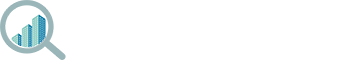
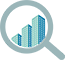
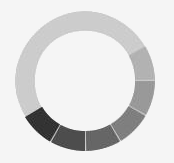
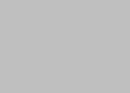

In [24]:
soup = BeautifulSoup(html, 'lxml')
print(soup)

In [25]:
countydatadf= pd.DataFrame()
countydatadf['County']= ['Dallas']
countydatadf['population']= [int(soup.find('section', id='population').text.split('County population in 2016: ')[1].split(' (')[0].replace(",",""))]
countydatadf['medhomevalue']= [int(soup.find('section', id='household-prices').text.split('Estimated median house or condo value in 2016: $')[1].split(' ')[0].replace(',', ''))]
countydatadf['medianincome']= [int(soup.find('section', id='household-prices').text.split('household income in 2016: $')[1].split(' ')[0].replace(',', ''))]

print(countydatadf)

   County  population  medhomevalue  medianincome
0  Dallas     2574984        154300         54399


In [26]:
countydatadf

,County,population,medhomevalue,medianincome
0,Dallas,2574984,154300,54399


In [27]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

db = client.citydata
collection = db.countyPopulation

In [36]:
browser.quit()